In [1]:
## step 1) data cleaning ##

# import necessary tools:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

data = pd.read_csv("/workspaces/DS_project/Cleaned_Data/usa_with_snow.csv")

In [3]:
data["vertical"] = data["Highest point"] - data["Lowest point"]

In [4]:
data.columns

Index(['Resort', 'Country', 'Price', 'Season', 'Highest point', 'Lowest point',
       'Beginner slopes', 'Intermediate slopes', 'Difficult slopes',
       'Total slopes', 'Snow cannons', 'Total lifts', 'Lift capacity',
       'Snowparks', 'Nightskiing', 'latitude', 'longitude', 'Snow',
       'vertical'],
      dtype='object')

/tmp/ipykernel_10746/2493437892.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diff.replace([np.inf, -np.inf], np.nan, inplace=True)


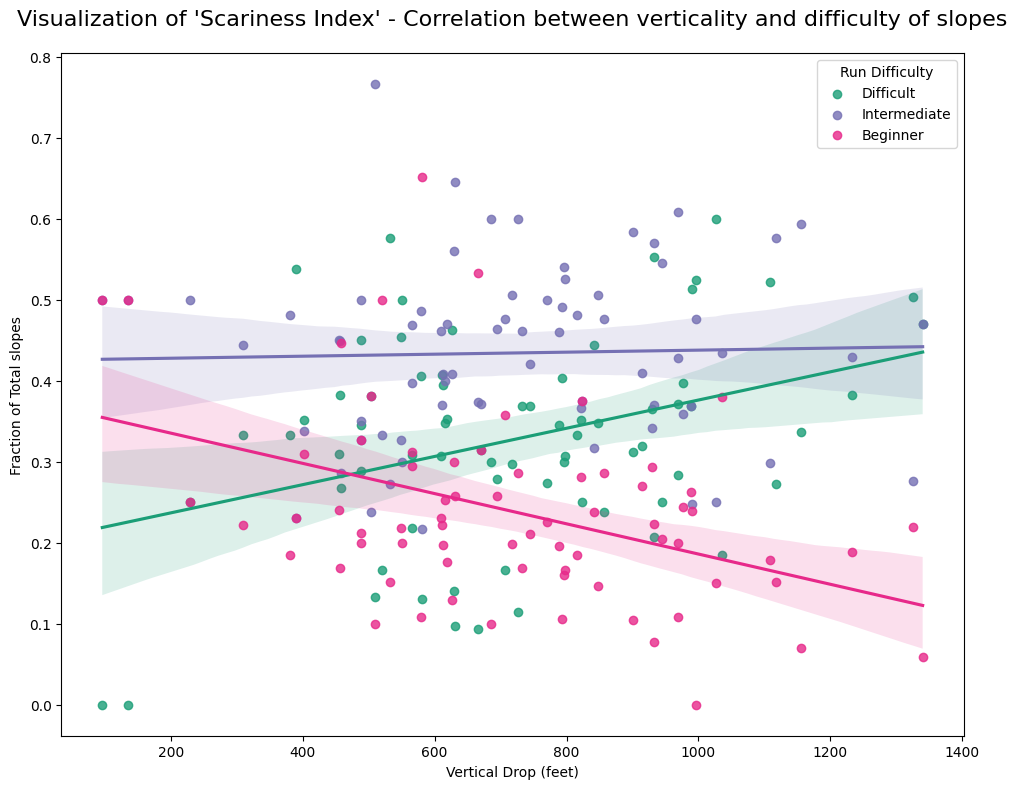

In [6]:
# Hmmm... Based on thata information, you might think, 
#   "That makes sense- of course places like Missouri and Wisconsin wouldn't have many expert slopes
#   while more mountainous places like Wyoming and Montana do."
# Do we see a relationship between how moutnainous a resort is and how difficult the slopes are?

 # dataframe for "difficulty"
diff = pd.DataFrame(index=data.index)
diff["Resort"] = data.get("Resort", data.index)
# add vertical to diff (ensure numeric)



# columns to use:
diff_cols = ["Beginner slopes", "Intermediate slopes", "Difficult slopes"]
total_col = "Total slopes"

# initialize diff with an index and identifier column
diff = pd.DataFrame(index=data.index)
diff["Resort"] = data.get("Resort", data.index)
diff["vertical"] = pd.to_numeric(data.get("vertical", pd.Series(index=data.index)), errors="coerce")
# add resort location/state to diff
diff["Location (State)"] = data.get("Location (State)", pd.Series(index=data.index, dtype="object"))

for c in diff_cols:
    data[c] = pd.to_numeric(data[c].astype(str).str.replace(",", "", regex=False), errors="coerce")
    base_name = c.lower().replace(" ", "_")      # e.g. "beginner_slopes"
    frac_col = f"{base_name}_frac"               # fraction of total slopes

    diff[frac_col] = data[c] / data[total_col]

# handle infinite results and keep NaNs for missing/zero totals
diff.replace([np.inf, -np.inf], np.nan, inplace=True)


## "diff" is a dataframe containing the decimal fraction of different run difficulties
# verticality vs % difficult slopes (or what I'm calling: scariness index)
import scipy

plt.figure(figsize= (10,8))
col = sns.color_palette("Dark2", 4)
sc_in = sns.regplot(x = data["vertical"], y = diff["difficult_slopes_frac"], color = col[0], label = "Difficult")

sc_in_neg1 = sns.regplot(x = data["vertical"], y = diff["intermediate_slopes_frac"], color = col[2], label = "Intermediate")

sc_in_neg2 = sns.regplot(x = data["vertical"], y = diff["beginner_slopes_frac"], color = col[3], label = "Beginner")


# sc_in_comb = sns.regplot(x = data["vertical"], y = diff["advanced_slopes_frac"] + diff ["expert_slopes_frac"])
    # combined expert and advanceed slopes
plt.legend(title="Run Difficulty", loc='best')
plt.xlabel("Vertical Drop (feet)")
plt.ylabel("Fraction of Total slopes")
plt.title("Visualization of 'Scariness Index' - Correlation between verticality and difficulty of slopes", 
          fontsize = 16, pad = 20)

plt.tight_layout()
plt.show()
# this plot shows how the % of run difficulty is related to the verticality (slope) of the resort
    # the most positive slope is expert, and the most negative is beginner, which makes sense!